In [ ]:
# Check the GPU stats
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Tue Aug 30 10:25:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    23W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Mount Google Drive to /content/gdive dir
from google.colab import drive
drive.mount('/content/gdrive')

# List the files in the My Drive dir
!ls "/content/gdrive/My Drive/"

Mounted at /content/gdrive
'Colab Notebooks'  'Machine Learning'   segmentations.zip


In [ ]:
# Magic word does not work for specific tensorflow version
# %tensorflow_version 2.4

# But this works
!pip install tensorflow-gpu==2.4.1
#!pip install matplotlib==3.3.4
!pip install numpy==1.19.5
!pip install opencv==4.5.1.48

# Hack to make colab working (Env restart required)
!pip uninstall -y matplotlib
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.3 MB 14 kB/s 
     |████████████████████████████████| 132 kB 70.1 MB/s 
     |████████████████████████████████| 462 kB 51.3 MB/s 
     |████████████████████████████████| 3.8 MB 60.3 MB/s 
     |████████████████████████████████| 14.8 MB 49.6 MB/s 
     |████████████████████████████████| 2.9 MB 50.9 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68723 sha256=f7e5c455ae4630f08875cd71570fd084108581584a6ae0199278953fdd223e16
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: n

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv==4.5.1.48 (from versions: none)
ERROR: No matching distribution found for opencv==4.5.1.48
Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Successfully uninstalled matplotlib-3.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 14.5 MB/s 
     |████████████████████████████████| 957 kB 60.8 MB/s 


In [ ]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")
print(tf.config.list_physical_devices('GPU'))

Python Platform: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
Tensor Flow Version: 2.4.1
Keras Version: 2.4.0

Python 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Pandas 1.3.5
Scikit-Learn 1.0.2
GPU is available
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!mkdir COCO

!wget http://images.cocodataset.org/zips/train2017.zip
!unzip train2017.zip
!rm train2017.zip

!wget http://images.cocodataset.org/zips/val2017.zip
!unzip val2017.zip
!rm val2017.zip

#!wget http://images.cocodataset.org/zips/test2017.zip
#!unzip test2017.zip
#!rm test2017.zip

!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip
!rm annotations_trainval2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/000000117492.jpg  
 extracting: val2017/000000368900.jpg  
 extracting: val2017/000000376900.jpg  
 extracting: val2017/000000352491.jpg  
 extracting: val2017/000000330790.jpg  
 extracting: val2017/000000384850.jpg  
 extracting: val2017/000000032735.jpg  
 extracting: val2017/000000197004.jpg  
 extracting: val2017/000000526751.jpg  
 extracting: val2017/000000041488.jpg  
 extracting: val2017/000000153632.jpg  
 extracting: val2017/000000501523.jpg  
 extracting: val2017/000000405691.jpg  
 extracting: val2017/000000040757.jpg  
 extracting: val2017/000000219485.jpg  
 extracting: val2017/000000428280.jpg  
 extracting: val2017/000000209222.jpg  
 extracting: val2017/000000353051.jpg  
 extracting: val2017/00000019

In [ ]:
# Unzip Masks
!unzip /content/gdrive/MyDrive/segmentations.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/segmentations/train/000000308172.jpg  
  inflating: content/segmentations/train/000000047173.jpg  
  inflating: content/segmentations/train/000000415135.jpg  
  inflating: content/segmentations/train/000000340082.jpg  
  inflating: content/segmentations/train/000000319649.jpg  
  inflating: content/segmentations/train/000000090864.jpg  
  inflating: content/segmentations/train/000000210883.jpg  
  inflating: content/segmentations/train/000000424960.jpg  
  inflating: content/segmentations/train/000000405444.jpg  
  inflating: content/segmentations/train/000000437865.jpg  
  inflating: content/segmentations/train/000000354095.jpg  
  inflating: content/segmentations/train/000000218749.jpg  
  inflating: content/segmentations/train/000000065924.jpg  
  inflating: content/segmentations/train/000000048432.jpg  
  inflating: content/segmentations/train/000000399556.jpg  
  inflating: content/segmentations/train/00000023

In [ ]:
# Create folder structure
!mkdir /content/COCO
!mkdir /content/COCO/images
!mkdir /content/COCO/masks
!mkdir /content/COCO/images/train
!mkdir /content/COCO/images/val
!mkdir /content/COCO/masks/train
!mkdir /content/COCO/masks/val

mkdir: cannot create directory ‘/content/COCO’: File exists


In [ ]:
# Move data for training
!mv /content/content/segmentations/train /content/COCO/masks/
!mv /content/content/segmentations/val /content/COCO/masks/

# Rename folders
!mv /content/train2017 /content/train
!mv /content/val2017 /content/val
#!mv /content/test2017 /content/test

# Move folders to COCO dir
!mv /content/train /content/COCO/images
!mv /content/val /content/COCO/images

In [ ]:
!ls -U /content/COCO/images/train | wc -l
!ls -U /content/COCO/images/val | wc -l
!ls -U /content/COCO/masks/train | wc -l
!ls -U /content/COCO/masks/val | wc -l

118287
5000
64115
2693


In [ ]:
# Imports
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob
from tqdm import tqdm

In [ ]:
train_mask_dir = "/content/COCO/masks/train/"
val_mask_dir = "/content/COCO/masks/val/"

train_images = glob(os.path.join(train_mask_dir, "*"))
val_images = glob(os.path.join(val_mask_dir, "*"))

Dims:  (427, 640, 3)


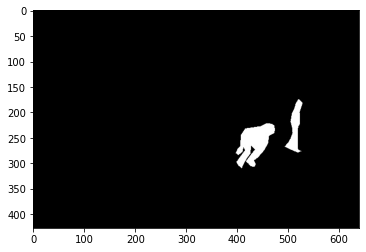

In [ ]:
img_path = train_images[0]
img = cv2.imread(img_path)
print("Dims: ", img.shape)
plt.imshow(img[:,:,::-1])
plt.show()

Input Shape: (10, 512, 512, 3), Target Shape: (10, 512, 512, 1)


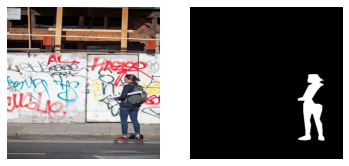

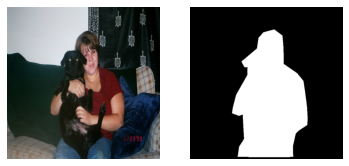

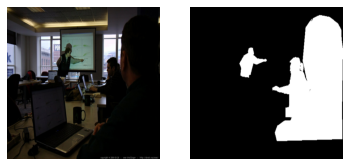

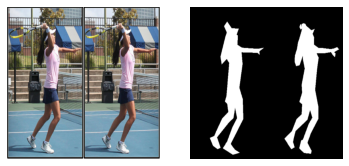

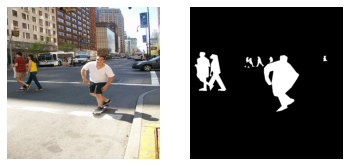

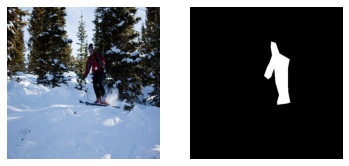

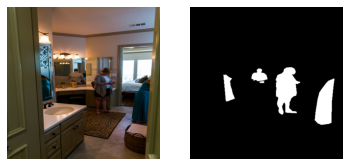

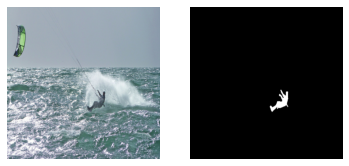

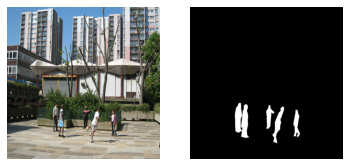

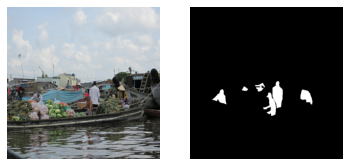

In [ ]:
# A quick Tensorflow Data loader
class DataLoader:
    """
    Assuming Dataset Path Structure:
    - Train Images: /media/ActiveTraining/Datasets/COCO/images/train
    - Val Images: /media/ActiveTraining/Datasets/COCO/images/val
    - Train Masks: /media/ActiveTraining/Datasets/COCO/masks/train
    - Val Masks: /media/ActiveTraining/Datasets/COCO/masks/val
    """
    def __init__(self, masks_dir, target_shape=(512, 512)):
        masks_dir = self.__fix_glob(masks_dir)
        self.files = tf.data.Dataset.list_files(masks_dir, shuffle=True)
        self.AUTOTUNE = tf.data.experimental.AUTOTUNE
        self.target_shape = target_shape
        
    def __fix_glob(self, dir_path):
        if not dir_path.endswith("*"):
            dir_path = os.path.join(dir_path, "*")
            
        return dir_path
    
    @tf.function
    def parse_images(self, mask_path):
        mask = tf.io.read_file(mask_path)
        mask = tf.io.decode_jpeg(mask, channels=1)
        mask = tf.cast(mask, tf.float32)
        
        image_path = tf.strings.regex_replace(mask_path, "masks", "images")
        image = tf.io.read_file(image_path)
        image = tf.io.decode_jpeg(image, channels=3)
        image = tf.cast(image, tf.float32)
        
        mask = tf.image.resize(
            mask, 
            self.target_shape, 
        ) / 255.
        
        image = tf.image.resize(
            image, 
            self.target_shape, 
        ) / 255.
        
        return image, mask
    
    @tf.function
    def data_generator(self, batch_size=64):
        dataset = self.files.map(self.parse_images)
        dataset = dataset.repeat()
        dataset = dataset.batch(batch_size)
        dataset = dataset.prefetch(buffer_size = self.AUTOTUNE)
        return dataset
    
test_dataset = DataLoader(train_mask_dir)
batch = test_dataset.data_generator(10)
inputs, targets = next(iter(batch))
print(f"Input Shape: {inputs.shape}, Target Shape: {targets.shape}")

for i, t in zip(inputs, targets):
    plt.subplot(1, 2, 1)
    plt.imshow(i)
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(t, cmap="gray")
    plt.axis("off")
    plt.show()

In [ ]:
# Callbacks
early_stop_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
model_ckpt_cb = tf.keras.callbacks.ModelCheckpoint(
    "weights.h5",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
)
reduce_lr_cb = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=4,
    verbose=1,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=10e-8,
)

# Model Architecture

input_img = tf.keras.Input(shape=(None, None, 3))
    
# encoding architecture
x1 = tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same')(input_img)
x2 = tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same')(x1)
x3 = tf.keras.layers.MaxPool2D(padding='same')(x2)
x4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x5 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x4)
x6 = tf.keras.layers.MaxPool2D(padding='same')(x5)
encoded = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x6)

# decoding architecture
x7 = tf.keras.layers.UpSampling2D()(encoded)
x8 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x7)
x9 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x8)
x10 = tf.keras.layers.Add()([x5, x9])
x11 = tf.keras.layers.UpSampling2D()(x10)
x12 = tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same')(x11)
x13 = tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same')(x12)
x14 = tf.keras.layers.Add()([x2, x13])
decoded = tf.keras.layers.Conv2D(1, (3, 3), padding='same',activation='relu')(x14)
autoencoder = tf.keras.Model(input_img, decoded)
autoencoder.summary()

# Hyper Params
batch_size = 32
epochs = 50 # 50
lr = 0.001
target_shape=(224, 224)

opt = tf.keras.optimizers.Adam(learning_rate=lr)

autoencoder.compile(
    loss="binary_crossentropy", 
    optimizer=opt, 
    metrics=[
        "mse",
])

# Dataset Generator
train_dataset = DataLoader(train_mask_dir, target_shape=target_shape)
train_generator = train_dataset.data_generator(batch_size)

val_dataset = DataLoader(val_mask_dir, target_shape=target_shape)
val_generator = val_dataset.data_generator(batch_size)

# Calculate Num Steps
train_steps = len(list(train_dataset.files)) // batch_size + 1
val_steps = len(list(val_dataset.files)) // batch_size + 1


# Train
history = autoencoder.fit(
    train_generator,
    validation_data=val_generator,
    batch_size=batch_size, 
    steps_per_epoch=train_steps,
    validation_steps=val_steps,
    epochs=epochs, 
    callbacks=[
        early_stop_cb, 
        model_ckpt_cb, 
        reduce_lr_cb
    ])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 6 4864        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 102464      conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, None, None, 6 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
# Matplotlib Plots (For Easy Rendering)

# Learning Rate
plt.plot(history.history['lr'])
plt.title('Learning Rate')
plt.xlabel("Epochs")
plt.ylabel("LR Value")
plt.show()

# Loss Curves
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title('Loss Curves')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# MSE Curves
plt.plot(history.history['mse'], label="Train MSE")
plt.plot(history.history['val_mse'], label="Val MSE")
plt.title('MSE Curves')
plt.xlabel("Epochs")
plt.ylabel("MSe")
plt.legend()
plt.show()

In [ ]:
%time
inputs, targets = next(iter(val_generator))
preds = autoencoder.predict(inputs)

In [ ]:
plt.rcParams["figure.figsize"] = (20, 5)

threshold = 0.5

for i, p, t in zip(inputs, preds, targets):
    op = p.copy()
    p[p < threshold] = 0
    p[p >= threshold] = 1
    
    plt.subplot(1, 4, 1)
    plt.imshow(i)
    plt.title("Input Image")
    plt.axis("off")
    plt.subplot(1, 4, 2)
    plt.imshow(op, cmap="gray")
    plt.title("Predicted Image")
    plt.axis("off")
    plt.subplot(1, 4, 3)
    plt.imshow(p, cmap="gray")
    plt.title("Predicted Mask (Thresholded)")
    plt.axis("off")
    plt.subplot(1, 4, 4)
    plt.imshow(t, cmap="gray")
    plt.title("True Mask")
    plt.axis("off")
    plt.show()

In [ ]:
!cp /content/weights.h5 /content/gdrive/My\ Drive/50epocha-weights.h5

In [ ]:
#rm -rf /content/weights.h5